In [73]:
import warnings
import textblob
import nltk
import string
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from os import path
from PIL import Image
from nltk import *
from textblob import TextBlob
from plotly.subplots import make_subplots
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

from bs4 import BeautifulSoup
nltk.download('punkt')
nltk.download('stopwords')

warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akhur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akhur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Selecting all values in text except None 
df_test = df_test[df_test['text'] != 'None']
df_test.reset_index(inplace=True)
df_test.drop(columns=('index'), inplace=True)

## Word Cloud

In [ ]:
# Generate wordcloud from the dataframe text column
def word_cloud_gen(column_name, data, picture_file=None, save=False):
    """
    Parameters:
        column_name: str
        data: pandas dataframe
        picture_file: (optional) str (Using a mask you can generate wordclouds in arbitrary shapes.)
    """
    txt = data[column_name].str.cat(sep=' ')
    stop = stopwords.words('english') #removing english stopwords
    stop.append('RT')
    stop.append('None')
  
    if picture_file is not None:
        # Get data directory and join picture_file directory
        d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
        mask = np.array(Image.open(path.join(d, picture_file)))
    wordcloud = WordCloud(
        stopwords=stop, background_color="white",
        max_font_size=100, mask=mask, 
        max_words=500, contour_color='steelblue').generate(txt)

    plt.figure(figsize=(15, 10), facecolor='k')
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    if save:
        # Store to file
        wordcloud.to_file(path.join(d, "wordcloud.png"))

In [ ]:
# word_cloud_gen(column_name="text", 
#                data=df_test, 
#                picture_file="donald-trump-united-states-anime-mangaka-topic-clipart.jpg", 
#                save=False)

## Heatmap of User Sentiment

In [ ]:
# Generate polarity plot from polarity column in dataframe
def polarity_plot(polarity_df): 
    z = np.sort(np.asarray(polarity_df))
    plt.figure(figsize= (15, 10))
    fig = make_subplots(
        rows=2, 
        cols=1,
        subplot_titles=("Heatmap of user sentiments(Polarity)",
                        "Sentiment Distribution(Polarity)"))
   # Heatmap
    fig.add_trace(go.Heatmap(
        z= [z],
        type='heatmap',
        colorscale='Viridis', zmax=1, zmin=-1,
        showscale=False), row=1, col=1)
  
    # Histogram
    fig.add_trace(go.Histogram(
        x= polarity_df,
        name='polarity',
        xbins=dict(start=-1.0, end=1.0)),row=2, col=1)
  
    fig.update_layout(
        autosize=False,
        width=800,
        height=500, 
        title_x=0.5, 
        title_text='Sentiment Distribution')
    fig.update_traces(opacity=0.75)
    fig.show()

In [ ]:
polarity_plot(df_test.polarity)

In [ ]:
def subjectivity_plot(subjectivity_df):
    z = np.sort(np.asarray(subjectivity_df))
    plt.figure(figsize=(15, 10))

    fig = make_subplots(
        rows=2, cols=1, 
        subplot_titles=(
            "Heatmap of user sentiments(Subjectivity)", 
            "Sentiment Distribution(Subjectivity)"))
    # Heatmap  
    fig.add_trace(go.Heatmap(
        z=[z], 
        type='heatmap', name='subjectivity',
        colorscale='Viridis', zmax=1, zmin=-1, 
        showscale=False), row=1, col=1)
 
    # Histogram
    fig.add_trace(go.Histogram(
        x=subjectivity_df, 
        name='subjectivity(0-1)',
        xbins=dict(start=0, end=1.0)), row=2, col=1)
    
    fig.update_layout(
        autosize=False,
        width=800,
        height=500, 
        title_x=0.5, 
        title_text='Sentiment Distribution')
    fig.show()

In [ ]:
subjectivity_plot(df_test.subjectivity)

## Tweets Samples with Positive Polarity

In [ ]:
# Samples of tweets with higher polarity
df_test['text'].loc[df_test.polarity >= 0.8].sample(5)

In [ ]:
# Samples of tweets with negative polarity
df_test['text'].loc[df_test.polarity < 0].sample(5).values

# Basic Visualization

In [3]:
cols = ["date", "time", "username", "tweet", "hashtags", "likes_count", "replies_count", "retweets_count"]
df = pd.read_csv("C:/Users/akhur/Downloads/forex.csv", 
                 usecols=cols)
print("# of tweets: {}".format(df.shape[0]))
df.sort_values(by="date", ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

# of tweets: 104339


,date,time,username,tweet,replies_count,retweets_count,likes_count,hashtags
0,2015-01-02,22:37:53,seekinwealth,"ForexLive: Cable continues lower, nears 1.5400...",0,0,0,['#forex']
1,2015-01-02,23:58:43,forexcommentary,Technical analysis: GBP/USD taking it on the c...,0,1,1,['#forex']
2,2015-01-02,23:57:17,cdethleffsen,Trends in US Manufacturing\n http://bit.ly/1Ai...,0,0,1,[]
3,2015-01-02,23:55:36,forexnow,Technical analysis: GBP/USD taking it on the c...,0,0,1,[]
4,2015-01-02,23:51:07,forexlive,"USD/JPY quickly gives up gains, slides back to...",0,0,1,[]


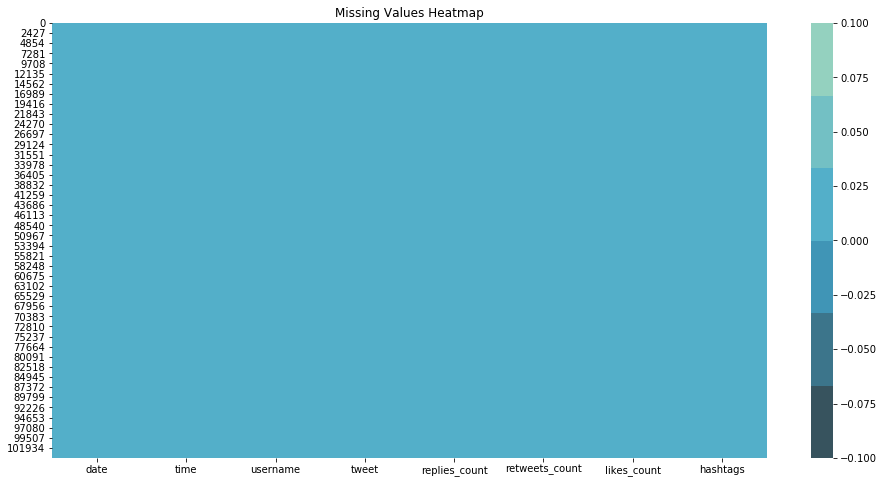

In [4]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.isnull(), cbar=True, cmap=sns.color_palette("GnBu_d"))
plt.title("Missing Values Heatmap")
plt.show()

In [5]:
before = df.shape[0]
print("# of tweets before dropping duplicates: {}".format(before))
df.drop_duplicates(inplace=True)
after = df.shape[0]
print("# of tweets after dropping duplicates: {}".format(after))
print("# of tweets being dropped: {}".format(before-after))

# of tweets before dropping duplicates: 104339
# of tweets after dropping duplicates: 104109
# of tweets being dropped: 230


## Matplotlib & Seaborn Helper Function

In [6]:
def add_frequency(ax, data):
    ncount = len(data)
    ax2 = ax.twinx()
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')
    ax2.set_ylim(0, 100)
    ax2.grid(None)
    
def upper_rugplot(data, height=.05, ax=None, **kwargs):
    from matplotlib.collections import LineCollection
    ax = ax or plt.gca()
    kwargs.setdefault("linewidth", 1)
    segs = np.stack((np.c_[data, data],
                     np.c_[np.ones_like(data), np.ones_like(data)-height]),
                    axis=-1)
    lc = LineCollection(segs, transform=ax.get_xaxis_transform(), **kwargs)
    ax.add_collection(lc)

## Basic Seaborn Plot

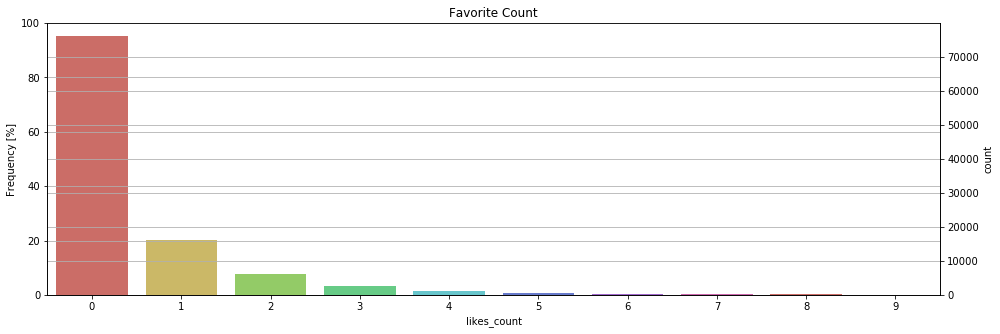

In [7]:
plt.figure(figsize=(16, 5))
ax = sns.countplot("likes_count", data=df, palette=sns.color_palette("hls", 8))
plt.title("Favorite Count")
plt.xlim((-0.5, 9.5))
plt.grid(axis="y")
add_frequency(ax, df)
plt.show()

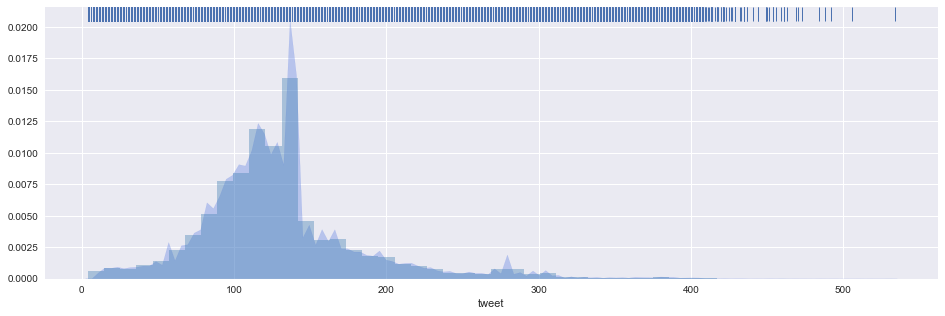

In [8]:
plt.style.use("seaborn")
plt.figure(figsize=(16, 5))
ax = sns.distplot(
    df["tweet"].map(len), color="steelblue", kde=True, 
    kde_kws={"color": "royalblue", "alpha": 0.3, "linewidth": .2, "shade": True, 'bw': 0.5})
upper_rugplot(df["tweet"].map(len), height=.05, ax=ax)
plt.show()

## Basic Spacy

In [9]:
# Spacy entity description: https://spacy.io/api/annotation
# conda install -c conda-forge spacy -y
import spacy
from spacy import displacy

def show_entities(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
    options = {"ents": ["ORG"], "colors": colors}
    displacy.render(doc, style="ent", jupyter=True)
    
show_entities(df.iloc[100]["tweet"])

## Tweet Pre-processing

In [10]:
# Dictionary of English Contractions
contractions_dict = {"ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [69]:
# Reference from https://github.com/Deffro/text-preprocessing-techniques/blob/master/techniques.py
import re
import nltk
from functools import partial
from collections import Counter
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

def remove_unicode(text):
    """ Removes unicode strings like "\u002c" and "x96" """
    text = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', text)       
    text = re.sub(r'[^\x00-\x7f]',r'',text)
    return text

def replace_URL(text):
    """ Replaces url address with "url" """
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','url',text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

def replace_at_user(text):
    """ Replaces "@user" with "atUser" """
    text = re.sub('@[^\s]+','atUser',text)
    return text

def remove_hashtag_in_front_of_word(text):
    """ Removes hastag in front of a word """
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

# Function for expanding contractions
def expand_contractions(text, contractions_dict=contractions_dict):
    # Regular expression for finding contractions
    contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

def remove_digits(text):
    answer = []
    for char in text:
        if not char.isdigit():
            answer.append(char)
    return ''.join(answer)

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

def ultimate_clean(text):
    text = text.lower()
    text = remove_unicode(text)
    text = replace_URL(text)
    text = replace_at_user(text)
    text = remove_hashtag_in_front_of_word(text)
    text = expand_contractions(text)
    text = remove_digits(text)
    text = remove_punct(text)
    return text

""" Creates a dictionary with slangs and their equivalents and replaces them """

with open('slang.txt', encoding="utf-8") as file:
    slang_map = dict(map(str.strip, line.partition('\t')[::2])
    for line in file if line.strip())
# Longest first for regex
slang_words = sorted(slang_map, key=len, reverse=True)
regex = re.compile(r"\b({})\b".format("|".join(map(re.escape, slang_words))))
replaceSlang = partial(regex.sub, lambda m: slang_map[m.group(1)])

def count_slang(text):
    """ Input: a text, Output: how many slang words and a list of found slangs """
    slangCounter = 0
    slangsFound = []
    tokens = nltk.word_tokenize(text)
    for word in tokens:
        if word in slang_words:
            slangsFound.append(word)
            slangCounter += 1
    return slangCounter, slangsFound

In [94]:
df['clean_tweet'].loc[4]

'usdjpy quickly gives up gains slides back to   orders  url'

In [70]:
df["date"] = pd.to_datetime(df.date)
df["time"] = pd.to_timedelta(df.time)
df["clean_tweet"] = df["tweet"].apply(lambda x: ultimate_clean(x))
df.head(5)

,date,time,username,tweet,replies_count,retweets_count,likes_count,hashtags,clean_tweet
0,2015-01-02,22:37:53,seekinwealth,"ForexLive: Cable continues lower, nears 1.5400...",0,0,0,['#forex'],forexlive cable continues lower nears orders...
1,2015-01-02,23:58:43,forexcommentary,Technical analysis: GBP/USD taking it on the c...,0,1,1,['#forex'],technical analysis gbpusd taking it on the chi...
2,2015-01-02,23:57:17,cdethleffsen,Trends in US Manufacturing\n http://bit.ly/1Ai...,0,0,1,[],trends in us manufacturing\n url\nby forexlive...
3,2015-01-02,23:55:36,forexnow,Technical analysis: GBP/USD taking it on the c...,0,0,1,[],technical analysis gbpusd taking it on the chi...
4,2015-01-02,23:51:07,forexlive,"USD/JPY quickly gives up gains, slides back to...",0,0,1,[],usdjpy quickly gives up gains slides back to ...


In [13]:
show_entities(df.iloc[100]["tweet"])
show_entities(df.iloc[100]["clean_tweet"])

In [72]:
df['clean_tweet'] 

0         forexlive cable continues lower nears   orders...
1         technical analysis gbpusd taking it on the chi...
2         trends in us manufacturing\n url\nby forexlive...
3         technical analysis gbpusd taking it on the chi...
4         usdjpy quickly gives up gains slides back to  ...
                                ...                        
104334                    you sound like a forex nigga  url
104335    watching videos about forex trading and they s...
104336    corporate america faces a higher bar on racial...
104337    i am a forex nigga sign up or catch the carona...
104338    that is correct atUser\ncheck out my profile n...
Name: clean_tweet, Length: 104109, dtype: object

In [16]:
# import gensim
# from gensim.parsing.preprocessing import STOPWORDS


In [74]:

headers = {'user-agent': 
           'Mozilla/5.0 (Macintosh Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.181 Safari/537.36'}
url = "https://www.forexcrunch.com/60-top-forex-twitter-accounts/"
res = requests.get(url, headers=headers).text
soup = BeautifulSoup(res, "html.parser")
trader_account = []
table = soup.find(name="ol")
for account in table.find_all(name="li"):
    name = account.find(name="a").text
    name = name.replace("@", "")
    trader_account.append(name)

url 92537
forex 50152
the 31098
to 26204
forexlive 23163
by 19923
news 19183
in 17776
for 17608
atuser 17369
is 16942
trading 15709
fx 14424
on 13451
of 13083
and 12394
via 10810
eurusd 8272
us 8197
rss 7505


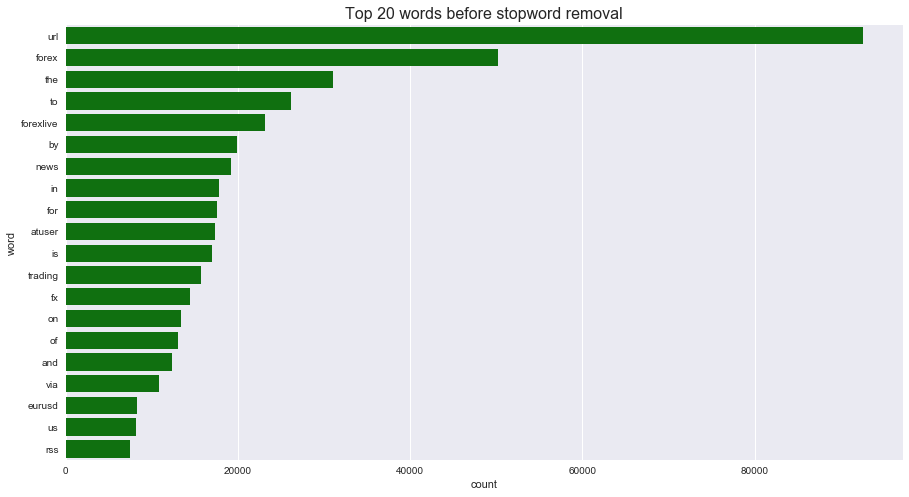

In [77]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['clean_tweet'], 20)
wordlist = []
for word, freq in common_words:
    wordlist.append(word)
    print(word, freq) 
df_uni = pd.DataFrame(common_words, columns = ['word','count'])
df_uni.groupby('word').sum()['count'].sort_values(ascending=False)
plt.figure(figsize = (15,8))
plt.title('Top 20 words before stopword removal',fontsize = 16)
sns.barplot(x = 'count',y = 'word',data = df_uni,color = 'green')

In [109]:
nlp = spacy.load("en_core_web_sm")
all_stopwords = spacy.lang.en.stop_words.STOP_WORDS
title = pd.read_csv("C:/Users/akhur/Desktop/stoplong.txt")
stoplong = list(title.a)
stop_list = wordlist+stoplong
for x in trader_account:
    stop_list.append(x)
all_stopwords.update(stop_list)
all_stopwords_final =all_stopwords
all_stopwords_final |= {'mike','ryan','patterson','adam', 'button','eamonn',
                        'sheridan','ryan','littlestone','greg','michalowski',
                        'technical','analysis','fb','forexsignal','earobot',
                        'forexalerts','forexsignal','fxzengroup','exness',
                        'rss','paterson','wrap','news','feed','breaking'}

banks 6641
usdjpy 5632
gbpusd 4996
trade 4675
today 4290
pips 4249
asia 3947
european 3645
dollar 3348
vs 3314
oil 3309
money 3289
fed 3248
data 3238
brexit 3184
market 3134
audusd 3099
china 3072
uk 2882
day 2768


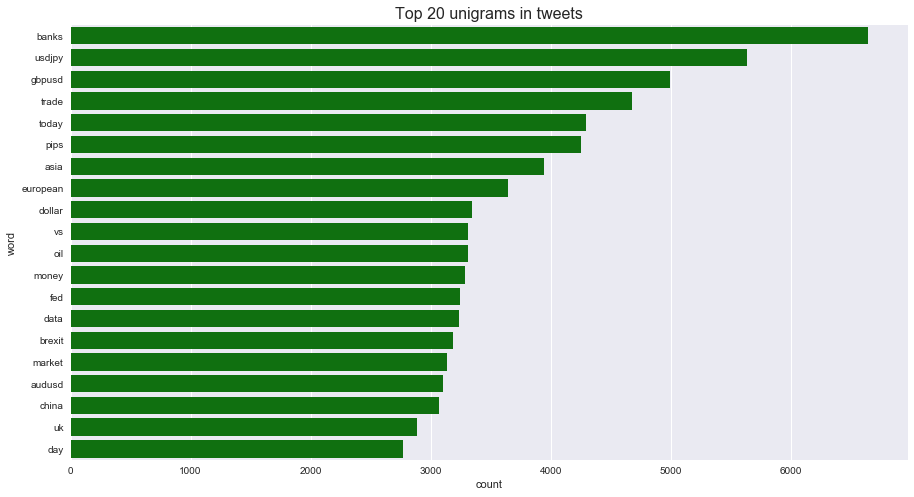

In [163]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words= all_stopwords_final).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['clean_tweet'], 20)
for word, freq in common_words:
    print(word, freq) 
df_uni = pd.DataFrame(common_words, columns = ['word','count'])
df_uni.groupby('word').sum()['count'].sort_values(ascending=False)
plt.figure(figsize = (15,8))
plt.title('Top 20 unigrams in tweets',fontsize = 16)
sns.barplot(x = 'count',y = 'word',data = df_uni,color = 'green')

pips total 1352
european morning 1343
total today 1341
today pips 1324
vs exp 1262
closed buy 806
finance markets 654
option expiries 626
westpac banks 606
bitcoin cryptocurrency 606
lots pips 604
danske bank 597
buy lots 581
ing banks 572
closed sell 547
bonus deposit 536
trade bonus 508
americas dollar 504
economic data 499
retail sales 496


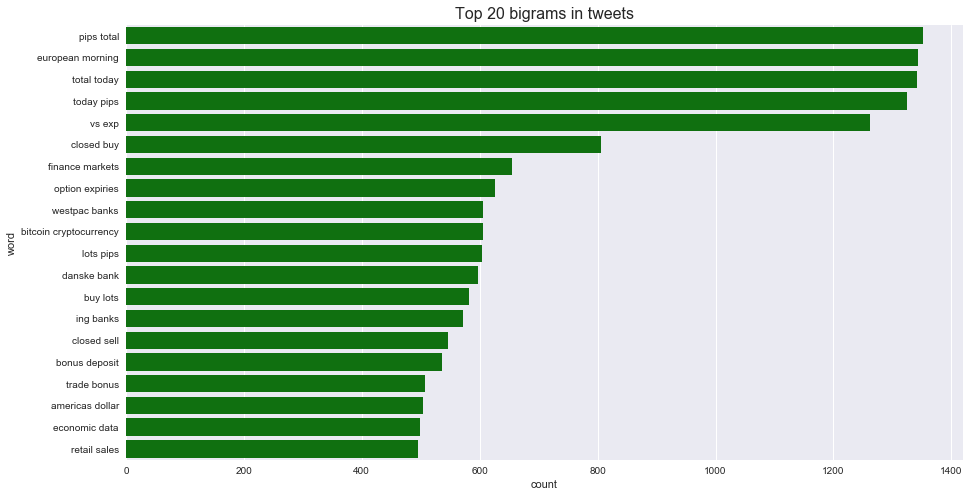

In [111]:
def get_top_bigrams(corpus, n=None):
    vec = CountVectorizer(stop_words=all_stopwords_final,ngram_range= (2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_bigrams(df['clean_tweet'],20)
for word, freq in common_words:
    print(word, freq)
df_big = pd.DataFrame(common_words, columns = ['word','count'])
df_big.groupby('word').sum()['count'].sort_values(ascending=False)
plt.figure(figsize = (15,8))
plt.title('Top 20 bigrams in tweets',fontsize = 16)
sns.barplot(x = 'count',y = 'word',data = df_big,color = 'green')


pips total today 1341
total today pips 1311
closed buy lots 560
lots pips total 513
trade bonus deposit 507
eur business job 377
european morning pound 361
trade ideas thread 352
closed sell lots 349
ideas european session 335
eurostoxx futures early 325
futures early european 308
noticias bitcoin cryptocurrency 306
strongest weakest currencies 300
expiries ny cut 291
option expiries ny 290
data coming session 281
sell lots pips 276
pips daytrading forexsignals 275
traders enter day 270


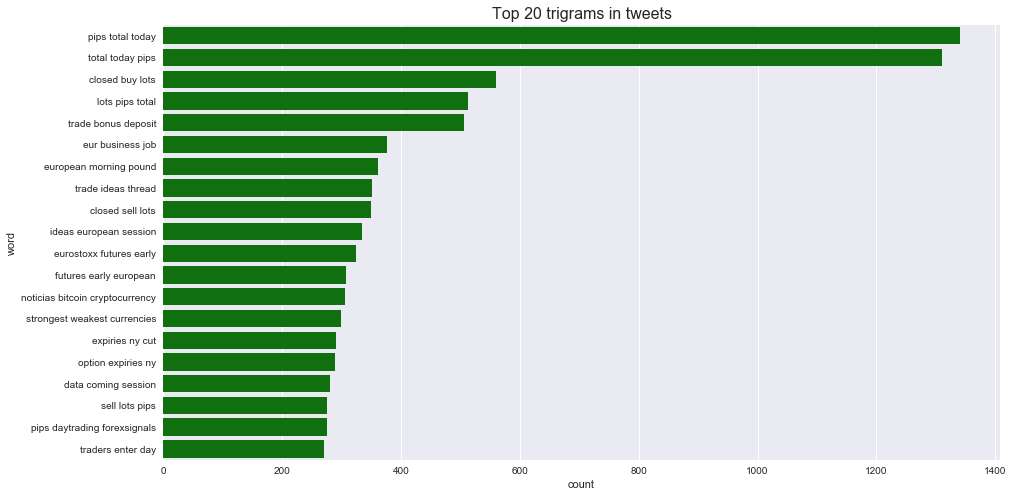

In [112]:
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(stop_words=all_stopwords_final,ngram_range= (3,3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_trigrams(df['clean_tweet'],20)
for word, freq in common_words:
    print(word, freq)
df_big = pd.DataFrame(common_words, columns = ['word','count'])
df_big.groupby('word').sum()['count'].sort_values(ascending=False)
plt.figure(figsize = (15,8))
plt.title('Top 20 trigrams in tweets',fontsize = 16)
sns.barplot(x = 'count',y = 'word',data = df_big,color = 'green')


In [24]:
def select_top_k_retweeted_tweets(df, k=5, print_result=False):
    tweet_df = df.sort_values(by='retweets_count', ascending=False)
    tweet_df = tweet_df.reset_index(drop=True)
    top_k_retweeted_tweets = []
    for i in range(k):
        top_k_retweeted_tweets.append(tweet_df['tweet'].iloc[i])
    if print_result:
        # Total tweets
        print('Total tweets this period:', len(df.index))
        print('='*30, "\n")
        # Retweets
        print('Mean retweets:', round(tweet_df['retweets_count'].mean(), 2), '\n')
        print('Top 5 retweeted tweets:')
        print('-'*25)
        for i in range(5):
            print("#{}: ".format(i+1), tweet_df['retweets_count'].iloc[i],
                  "\n", tweet_df['tweet'].iloc[i], "\n")
        print('\n')
    return top_k_retweeted_tweets
def select_top_k_liked_tweets(df, k=5, print_result=False):
    tweet_df = df.sort_values(by='likes_count', ascending=False)
    tweet_df = tweet_df.reset_index(drop=True)
    top_k_liked_tweets = []
    for i in range(k):
        top_k_liked_tweets.append(tweet_df['tweet'].iloc[i])
    if print_result:
        # Total tweets
        print('Total tweets this period:', len(df.index))
        print('='*30, "\n")
        # Likes
        print('Mean likes:', round(tweet_df['likes_count'].mean(), 2), '\n')
        print('Top 5 liked tweets:')
        print('-'*25)
        for i in range(5):
            print("#{}: ".format(i+1), tweet_df['likes_count'].iloc[i], "\n", tweet_df['tweet'].iloc[i], "\n")
        print('\n')
    return top_k_liked_tweets

In [81]:
print(select_top_k_retweeted_tweets(df))
print(select_top_k_liked_tweets(df))

["No way Delish Nguwaya wakes up, goes to Obadiah Moyo and says give me contract for US$60 MILLION and just like that deal sealed and George Guvamatanga delightedly pays. Doesn't happen. There's a QUEUE for forex payments at Treasury. Arresting Nguwaya is a waste of everyone's time  pic.twitter.com/ohnNJt5zsd", 'Positive news for the day.\nForex reserves have surged by 3.53 Billion dollars and have hit a record high of 404.921 billion dollars.\n\nAlso Stock market investors are Richer by 45.5 lakh crore in the calendar year 2017. Acche din to aaye Hai inko👏👏👏👏', 'Myth & Reality: in spite of all talk of being the greatest FDI/FII magnet in the world India will have a net fall in Forex reserves in 2016  https://twitter.com/richardrossow/status/814742572925145088\xa0…', '@Dr_Forex @_ArtLoveYou_RT @LynnAll98067612 @julie_mcwright  🌹The Queen of Bergen🌹 pic.twitter.com/QkOGXtpkcG', 'I have officially graduated from the University of California, Irvine, with my Bachelor’s degree in Biologica

In [137]:
# Generate wordcloud from the dataframe text column
def word_cloud_gen(column_name, data, picture_file=None, save=False):
    """
    Parameters:
        column_name: str
        data: pandas dataframe
        picture_file: (optional) str (Using a mask you can generate wordclouds in arbitrary shapes.)
    """
    txt = data[column_name].str.cat(sep=' ')
    stop = all_stopwords_final #removing english stopwords
  
    if picture_file is not None:
        # Get data directory and join picture_file directory
        d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
        mask = np.array(Image.open(path.join(d, picture_file)))
        
    wordcloud = WordCloud(stopwords=stop, background_color="white",
                          max_font_size=100,
                          max_words=500, contour_color='steelblue').generate(txt)

    plt.figure(figsize=(15,8), facecolor='k')
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    if save:
        # Store to file
        wordcloud.to_file(path.join(d, "wordcloud.png"))

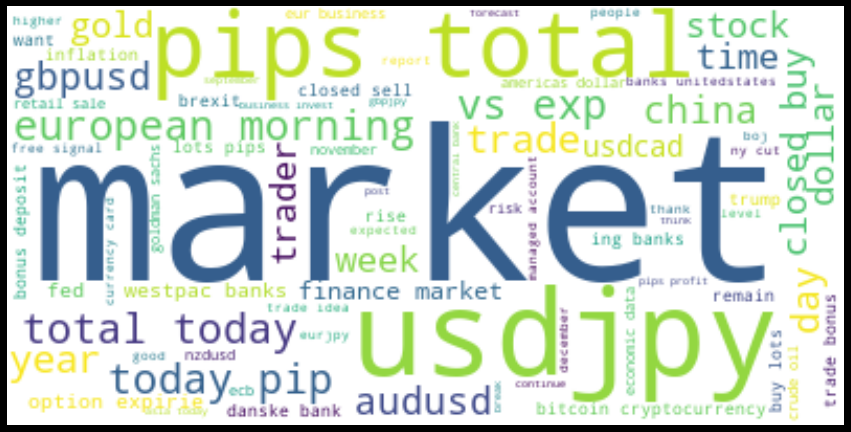

In [138]:
word_cloud_gen('clean_tweet',df,picture_file=None)

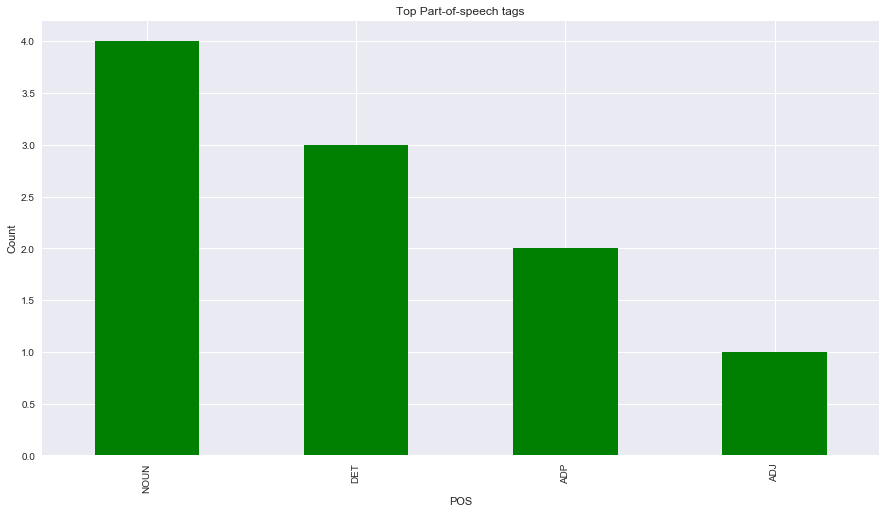

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop,is_punctuation
0,my,-PRON-,DET,PRP$,poss,xx,True,True,False
1,favourite,"(favourite,)",ADJ,JJ,amod,xxxx,True,False,False
2,comic,"(comic,)",NOUN,NN,ROOT,xxxx,True,False,False
3,about,"(about,)",ADP,IN,prep,xxxx,True,True,False
4,the,"(the,)",DET,DT,det,xxx,True,True,False
5,change,"(change,)",NOUN,NN,pobj,xxxx,True,False,False
6,of,"(of,)",ADP,IN,prep,xx,True,True,False
7,the,"(the,)",DET,DT,det,xxx,True,True,False
8,calendar,"(calendar,)",NOUN,NN,compound,xxxx,True,False,False
9,pictwittercomfluabeeir,"(pictwittercomfluabeeir,)",NOUN,NN,pobj,xxxx,True,False,False


In [139]:
def token_attributes(txt):
    doc = nlp(txt)
    tokenized_text = pd.DataFrame()
    for i, token in enumerate(doc):
        tokenized_text.loc[i, 'text'] = token.text
        tokenized_text.loc[i, 'lemma'] = token.lemma_,
        tokenized_text.loc[i, 'pos'] = token.pos_
        tokenized_text.loc[i, 'tag'] = token.tag_
        tokenized_text.loc[i, 'dep'] = token.dep_
        tokenized_text.loc[i, 'shape'] = token.shape_
        tokenized_text.loc[i, 'is_alpha'] = token.is_alpha
        tokenized_text.loc[i, 'is_stop'] = token.is_stop
        tokenized_text.loc[i, 'is_punctuation'] = token.is_punct
    options = {'compact': True, 'bg': 'green','distance': 140,
           'color': 'white', 'font': 'Arial'}
    displacy.render(doc.sents,style="dep",options = options,jupyter=True)
    pos_df = tokenized_text.pos.value_counts()
    plt.figure(figsize = (15,8))
    plt.title('Top Part-of-speech tags')
    plt.xlabel("POS")
    plt.ylabel('Count')
    pos_df.plot.bar(color = 'Green')
    plt.show()
    return tokenized_text[:20]

    
    
token_attributes(df['clean_tweet'].loc[8])


In [162]:
#tfid tokenization
from sklearn.feature_extraction.text import TfidfVectorizer    
final_tf = df['clean_tweet']
tf_idf = TfidfVectorizer(max_features=5000)
tf_data = tf_idf.fit_transform(final_tf)
print(tf_data)

  (0, 1692)	0.12335362798807965
  (0, 1843)	0.2814276505239017
  (0, 4684)	0.0771375563156671
  (0, 3073)	0.36305810918256126
  (0, 2894)	0.5272196557322119
  (0, 2569)	0.3445026374552006
  (0, 898)	0.405731877345582
  (0, 584)	0.42239518233927026
  (0, 1714)	0.1677566326063703
  (1, 436)	0.24266808271960483
  (1, 711)	0.35884894875423484
  (1, 4388)	0.09799830719658557
  (1, 3035)	0.12323266253051447
  (1, 2301)	0.33317925258061803
  (1, 4318)	0.5517851037011101
  (1, 153)	0.3451543405532493
  (1, 4345)	0.34654732801077787
  (1, 1692)	0.07430545171861383
  (1, 1843)	0.33905137675087277
  (1, 4684)	0.046465929377120116
  (1, 1714)	0.10105282323609056
  (2, 582)	0.23075120172545593
  (2, 2637)	0.5370551931793814
  (2, 4685)	0.3084441961289678
  (2, 2168)	0.24548910304062735
  :	:
  (104106, 2039)	0.3195574450559626
  (104106, 1510)	0.47544365379432685
  (104106, 922)	0.4878428879481456
  (104106, 3035)	0.18978759875591908
  (104106, 4684)	0.07156103730423011
  (104107, 2932)	0.488503049

In [177]:
#Stemming
temp = []
snow = nltk.stem.SnowballStemmer('english')
for sentence in df['clean_tweet']:
    sentence = sentence.lower() 
    words = [snow.stem(word) for word in sentence.split() if word not in all_stopwords_final]   # Stemming and removing stopwords
    temp.append(words)

In [180]:
df_test['clean_tweet'].iloc[15561:15598]

15561    forexlive asia fx news wrap japan gdp flat on ...
15562    forexlive asia fx news wrap japan gdp flat on ...
15563    forexlive asia fx news wrap japan gdp flat on ...
15565    forexlive asia fx news wrap japan gdp flat on ...
15566    news forexlive asia fx news wrap japan gdp fla...
15567    forex forexlive asia fx news wrap japan gdp fl...
15568            pboc sold net bn yuan of fx for july  url
15569    forexlive asia fx news wrap japan gdp flat on ...
15570    forexlive asia fx news wrap japan gdp flat on ...
15571    forexlive asia fx news wrap japan gdp flat on ...
15572             data coming up in this session  aug  url
15573    forexlive asia fx news wrap japan gdp flat on ...
15574    fxnews usd forexlive asia fx news wrap japan g...
15575    morgan stanley weekly outlook usd eur jpy gbp ...
15576    trade forex easily  bonus up to  on your first...
15577    news forexlive asia fx news wrap japan gdp fla...
15578    japan industrial production june mm final  vs .